# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Datetime for graph titles
from datetime import date

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&lat={lats[i]}&lon={lngs[i]}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
City not found. Skipping...
Processing Record 2 of Set 1 | la sarre
Processing Record 3 of Set 1 | leitchfield
Processing Record 4 of Set 1 | grytviken
City not found. Skipping...
Processing Record 5 of Set 1 | smithers
Processing Record 6 of Set 1 | port-aux-francais
City not found. Skipping...
Processing Record 7 of Set 1 | aasiaat
City not found. Skipping...
Processing Record 8 of Set 1 | uturoa
City not found. Skipping...
Processing Record 9 of Set 1 | blankenberge
City not found. Skipping...
Processing Record 10 of Set 1 | shingu
Processing Record 11 of Set 1 | tabou
City not found. Skipping...
Processing Record 12 of Set 1 | puerto natales
City not found. Skipping...
Processing Record 13 of Set 1 | edinburgh of the seven seas
City not found. Skipping...
Processing Record 14 of Set 1 | yellowknife
City not found. Skipping...
Processing Record 15 of Set 1 | yulinshi
City not found. Ski

Processing Record 37 of Set 3 | bonthe
City not found. Skipping...
Processing Record 38 of Set 3 | nova xavantina
Processing Record 39 of Set 3 | wajir
City not found. Skipping...
Processing Record 40 of Set 3 | jampur
Processing Record 41 of Set 3 | novobataysk
Processing Record 42 of Set 3 | bredasdorp
City not found. Skipping...
Processing Record 43 of Set 3 | midvagur
City not found. Skipping...
Processing Record 44 of Set 3 | kamyshin
Processing Record 45 of Set 3 | marquette
City not found. Skipping...
Processing Record 46 of Set 3 | ibshaway
City not found. Skipping...
Processing Record 47 of Set 3 | st. john's
City not found. Skipping...
Processing Record 48 of Set 3 | tangzhai
Processing Record 49 of Set 3 | spanish wells
Processing Record 0 of Set 4 | port elizabeth
City not found. Skipping...
Processing Record 1 of Set 4 | longyearbyen
City not found. Skipping...
Processing Record 2 of Set 4 | whakatane
City not found. Skipping...
Processing Record 3 of Set 4 | college
City 

City not found. Skipping...
Processing Record 23 of Set 6 | necochea
City not found. Skipping...
Processing Record 24 of Set 6 | margate
City not found. Skipping...
Processing Record 25 of Set 6 | buala
City not found. Skipping...
Processing Record 26 of Set 6 | veinticinco de mayo
City not found. Skipping...
Processing Record 27 of Set 6 | takoradi
Processing Record 28 of Set 6 | lampang
Processing Record 29 of Set 6 | tashtagol
City not found. Skipping...
Processing Record 30 of Set 6 | tiksi
City not found. Skipping...
Processing Record 31 of Set 6 | nampula
Processing Record 32 of Set 6 | acapulco de juarez
Processing Record 33 of Set 6 | trubchevsk
City not found. Skipping...
Processing Record 34 of Set 6 | twon-brass
City not found. Skipping...
Processing Record 35 of Set 6 | tolanaro
City not found. Skipping...
Processing Record 36 of Set 6 | bafoulabe
City not found. Skipping...
Processing Record 37 of Set 6 | hualahuises
Processing Record 38 of Set 6 | inari
City not found. Sk

City not found. Skipping...
Processing Record 4 of Set 9 | al jubayl
Processing Record 5 of Set 9 | farrukhnagar
Processing Record 6 of Set 9 | polillo
Processing Record 7 of Set 9 | barra
City not found. Skipping...
Processing Record 8 of Set 9 | hovd
City not found. Skipping...
Processing Record 9 of Set 9 | mhamid
City not found. Skipping...
Processing Record 10 of Set 9 | shimoda
City not found. Skipping...
Processing Record 11 of Set 9 | bel ombre
City not found. Skipping...
Processing Record 12 of Set 9 | newman
City not found. Skipping...
Processing Record 13 of Set 9 | dom pedrito
Processing Record 14 of Set 9 | parras de la fuente
City not found. Skipping...
Processing Record 15 of Set 9 | yantongshan
City not found. Skipping...
Processing Record 16 of Set 9 | kimberley
City not found. Skipping...
Processing Record 17 of Set 9 | baharly
City not found. Skipping...
Processing Record 18 of Set 9 | acajutla
City not found. Skipping...
Processing Record 19 of Set 9 | luanco
City n

City not found. Skipping...
Processing Record 36 of Set 11 | chunskiy
City not found. Skipping...
Processing Record 37 of Set 11 | tekkali
City not found. Skipping...
Processing Record 38 of Set 11 | slave lake
City not found. Skipping...
Processing Record 39 of Set 11 | sikasso
City not found. Skipping...
Processing Record 40 of Set 11 | aoulef
Processing Record 41 of Set 11 | qa'en
City not found. Skipping...
Processing Record 42 of Set 11 | mecca
Processing Record 43 of Set 11 | laguna
City not found. Skipping...
Processing Record 44 of Set 11 | pudozh
City not found. Skipping...
Processing Record 45 of Set 11 | vingt cinq
City not found. Skipping...
Processing Record 46 of Set 11 | boguchany
City not found. Skipping...
Processing Record 47 of Set 11 | novodvinsk
Processing Record 48 of Set 11 | hayma'
City not found. Skipping...
Processing Record 49 of Set 11 | minas de matahambre
Processing Record 0 of Set 12 | varna
City not found. Skipping...
Processing Record 1 of Set 12 | mayc

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          169
Lat           169
Lng           169
Max Temp      169
Humidity      169
Cloudiness    169
Wind Speed    169
Country       169
Date          169
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,la sarre,52.2037,-79.4918,-0.24,81,73,4.04,CA,1683555850
1,leitchfield,37.5853,-86.3864,20.25,99,100,5.35,US,1683555851
2,smithers,54.9273,-125.4221,0.14,94,86,1.33,CA,1683555851
3,shingu,52.0340,2.7880,12.00,89,100,6.68,NL,1683555851
4,waitangi,64.3707,-113.2304,8.79,52,2,6.11,CA,1683555852


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,la sarre,52.2037,-79.4918,-0.24,81,73,4.04,CA,1683555850
1,leitchfield,37.5853,-86.3864,20.25,99,100,5.35,US,1683555851
2,smithers,54.9273,-125.4221,0.14,94,86,1.33,CA,1683555851
3,shingu,52.0340,2.7880,12.00,89,100,6.68,NL,1683555851
4,waitangi,64.3707,-113.2304,8.79,52,2,6.11,CA,1683555852


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

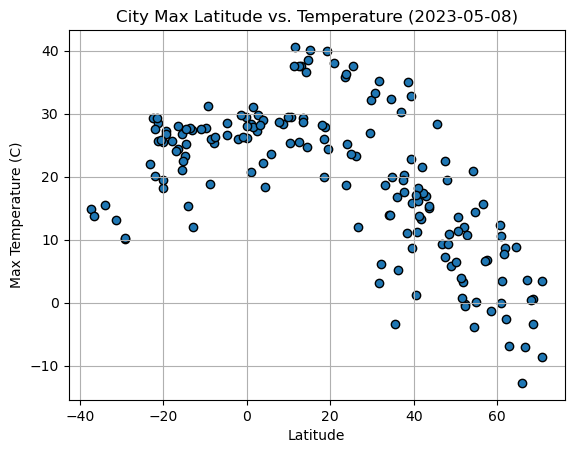

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black')

# Incorporate the other graph properties

# !!!the starter code had this typo in its example plot!!! - pls make note of it in the comment
plt.title(f'City Max Latitude vs. Temperature ({date.today()})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

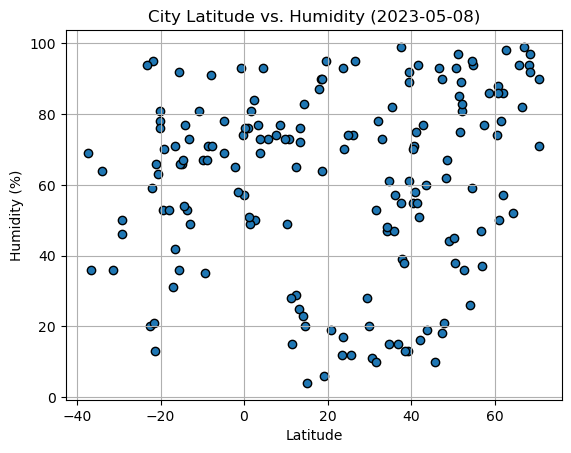

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({date.today()})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

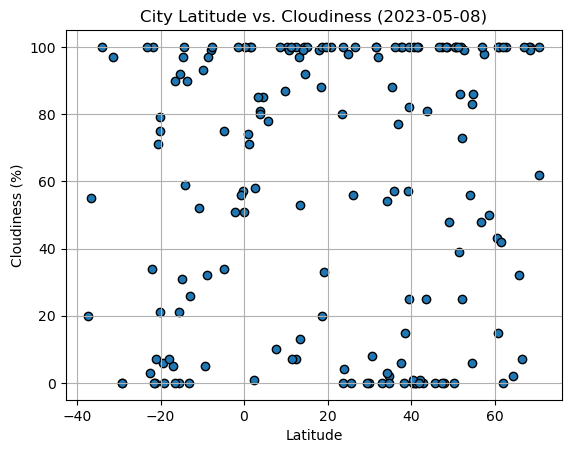

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({date.today()})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

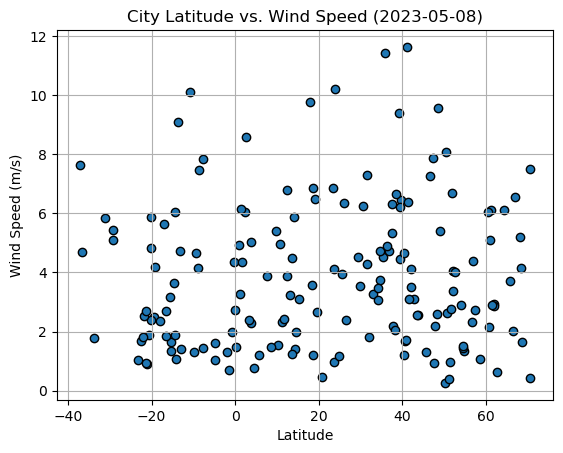

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({date.today()})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_reg(x, y):
    print(f'The r-value is: {st.pearsonr(x, y)[0]}')
    (slope, intercept, rvalue, pvalue, stderr)=st.linregress(x, y)
    regress_values =  x * slope + intercept
    line_equation = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
    plt.scatter(x, y)
    plt.plot(x, regress_values, 'r-')
    plt.xlabel('Latitude')
    plt.ylabel(y.name)
    return line_equation
def anno_format(line_equation, x, y):
    plt.annotate(line_equation, (x,y), fontsize=15,color='red')

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,la sarre,52.2037,-79.4918,-0.24,81,73,4.04,CA,1683555850
1,leitchfield,37.5853,-86.3864,20.25,99,100,5.35,US,1683555851
2,smithers,54.9273,-125.4221,0.14,94,86,1.33,CA,1683555851
3,shingu,52.0340,2.7880,12.00,89,100,6.68,NL,1683555851
4,waitangi,64.3707,-113.2304,8.79,52,2,6.11,CA,1683555852


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
23,alice springs,-9.2893,-37.1759,31.22,35,5,4.65,BR,1683555870
25,holualoa,-13.2273,44.9166,27.50,73,0,4.74,YT,1683555870
27,xining,-31.2862,121.3832,13.13,36,97,5.84,AU,1683555871
29,tirat karmel,-9.7919,-48.9969,27.77,67,93,1.29,BR,1683555871
30,mumford,-20.1219,-70.3325,18.28,78,79,4.84,CL,1683555871


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7720398490524698


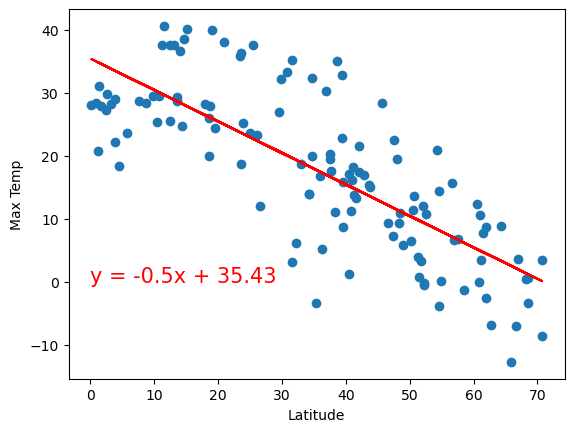

In [15]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
line = linear_reg(x, y)
anno_format(line, 0, 0)

The r-value is: 0.5943996530685159


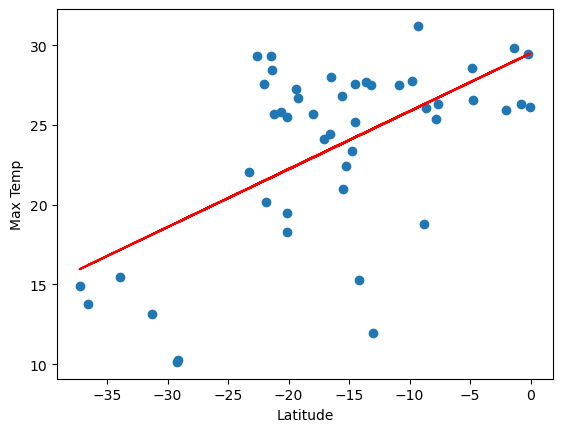

In [16]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
line = linear_reg(x, y)
anno_format(line, -45, 25)

**Discussion about the linear relationship:** Temperature's tend to increase as you approach 0 Latitude (The Equator).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1916878781577957


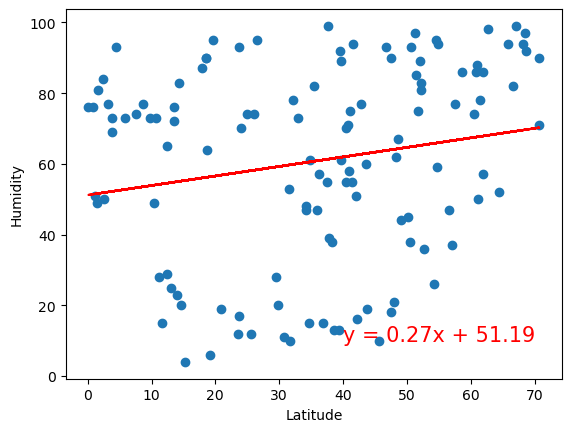

In [17]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
line = linear_reg(x, y)
anno_format(line, 40, 10)

The r-value is: 0.2957386543669609


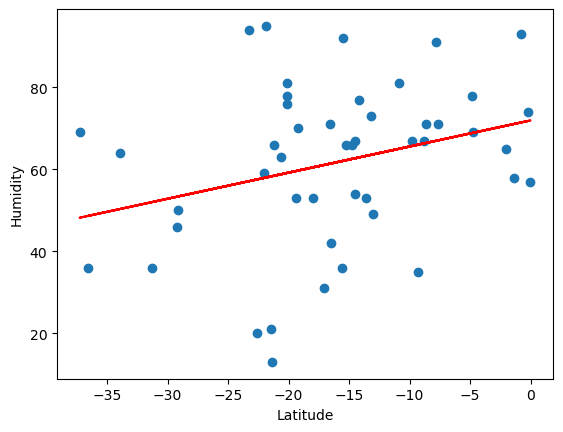

In [18]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
line = linear_reg(x, y)
anno_format(line, -40, 30)

**Discussion about the linear relationship:** No discernable patterns

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.0781966455155591


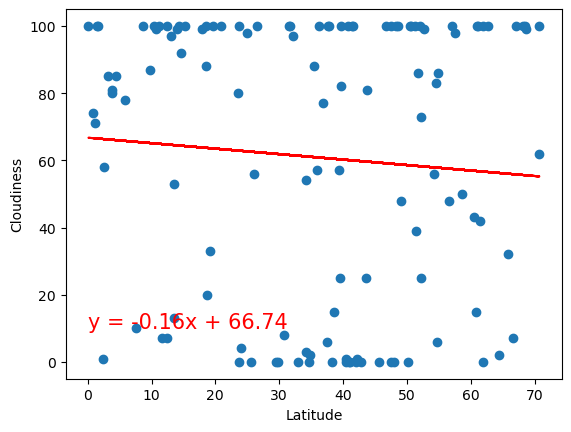

In [19]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
line = linear_reg(x, y)
anno_format(line, 0, 10)

The r-value is: 0.18630674253854837


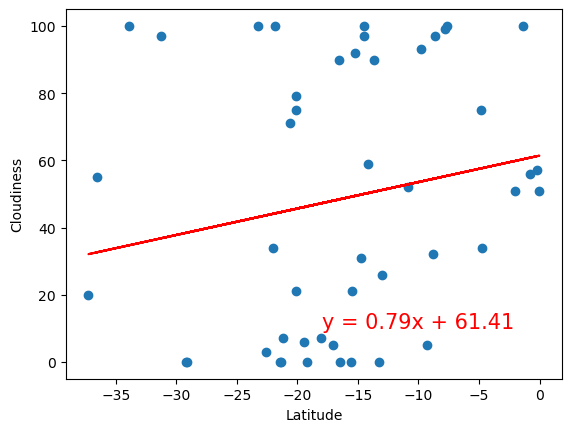

In [20]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
line = linear_reg(x, y)
anno_format(line, -18, 10)

**Discussion about the linear relationship:** No discernable patterns

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.03495445292020532


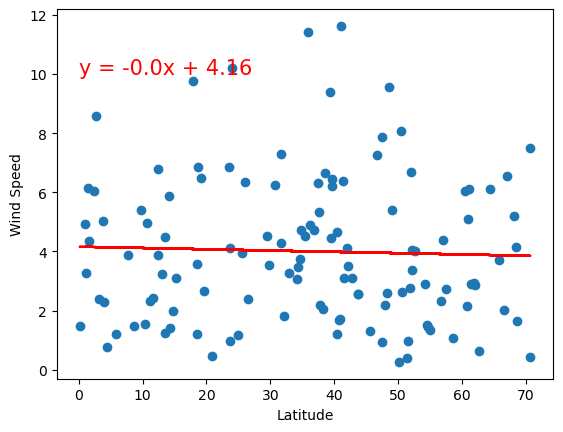

In [21]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
line = linear_reg(x, y)
anno_format(line, 0, 10)

The r-value is: -0.14361011434747498


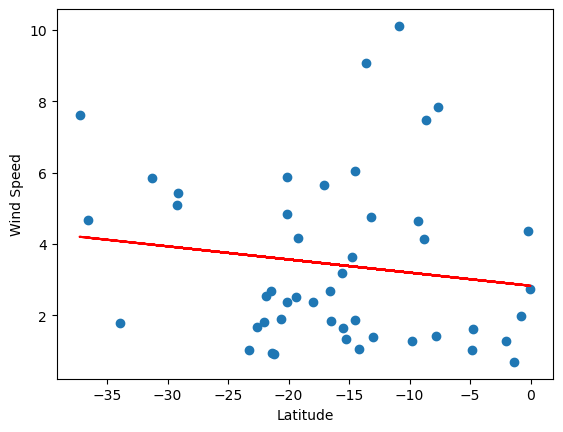

In [22]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
line = linear_reg(x, y)
anno_format(line, -40, 7)

**Discussion about the linear relationship:** No discernable pattern